## Урок 4
Графики

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Изучите стоимости недвижимости

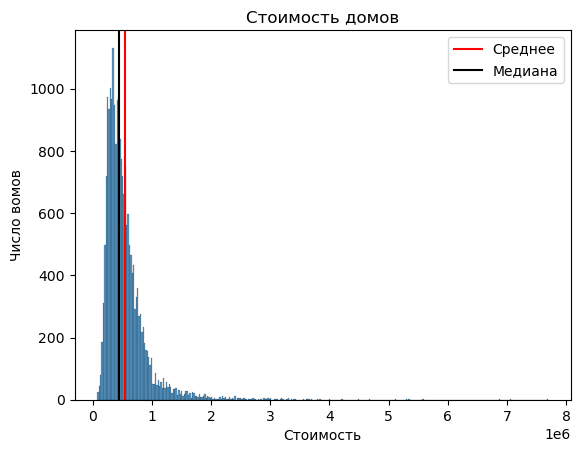

Можем сказать, что средняя цена равна 540088.0, станддартное отклонение равно 367119.0 и медиана равна 450000.0
Очевидно, есть смещение среднего вверх из-за малого количества сильно дорогих домов.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.histplot(data=df, x="price");

mean_ = np.round(df['price'].mean())
median_ = np.round(df['price'].median())
std_ = np.round(np.std(df['price']))

plt.axvline(x=mean_, color='r', label="Среднее")
plt.axvline(x=median_, color='black', label="Медиана")


plot.set_title("Стоимость домов")
plot.set_xlabel("Стоимость")
plot.set_ylabel("Число вомов")

plot.legend()

plt.show()

print(f'Можем сказать, что средняя цена равна {mean_}, станддартное отклонение равно {std_} и медиана равна {median_}')

print('Очевидно, есть смещение среднего вверх из-за малого количества сильно дорогих домов.')

Изучите распределение квадратуры жилой

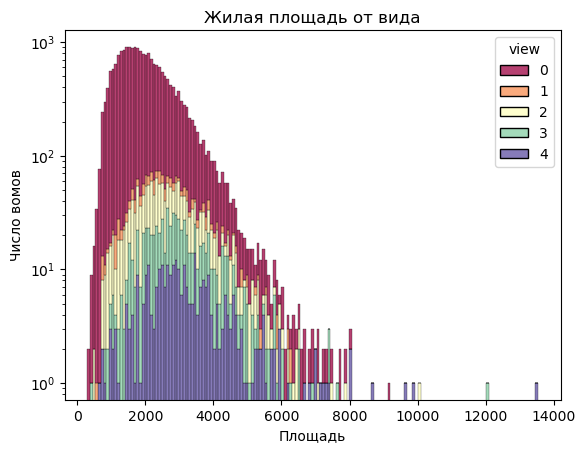

sqft_living        
             mean  median
view                     
0     1997.761660  1850.0
1     2568.960843  2420.0
2     2655.257529  2470.0
3     3018.564706  2840.0
4     3351.473354  3050.0

In [3]:
sns.set_palette(sns.color_palette("Paired"))

plot = sns.histplot(df, x="sqft_living", hue="view", multiple="stack", palette = "Spectral");
plot.set_yscale("log")

plot.set_title("Жилая площадь от вида")
plot.set_xlabel("Площадь")
plot.set_ylabel("Число вомов")

plt.show()

df.groupby('view').agg({'sqft_living': ['mean', 'median']})

        Можно говорить о том, что с ростом красоты вида из окна растет и жилая площадь дома.

Изучите распределение года постройки

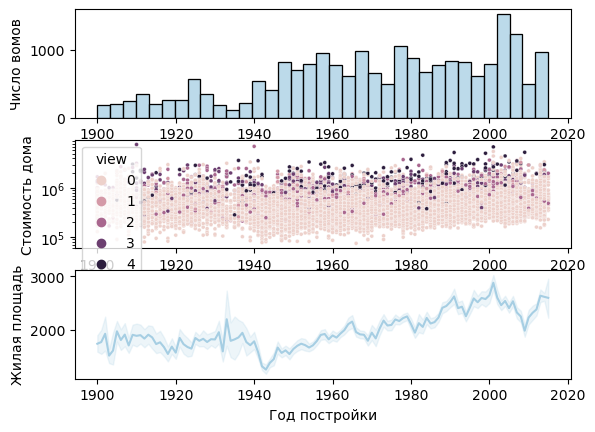

In [4]:
fig, axes = plt.subplots(3, 1)

count_plot = sns.histplot(df, x="yr_built", ax=axes[0]);
count_plot.set_xlabel("Год постройки");
count_plot.set_ylabel("Число вомов");

price_plot = sns.scatterplot(data=df, x="yr_built", y="price", hue="view", ax=axes[1], s=8)
price_plot.set_xlabel("Год постройки");
price_plot.set_ylabel("Стоимость дома");
price_plot.set_yscale("log");

area_plot = sns.lineplot(data=df, x="yr_built", y="sqft_living", ax=axes[2]);
area_plot.set_xlabel("Год постройки");
area_plot.set_ylabel("Жилая площадь");

        В целом со временем строят все больше и больше домов
        Зависимости стоимости и вида от года построки не наблюдается
        Со временем стоят дома большего размера

Изучите распределение домов от наличия вида на набережную

0    21450
1      163
Name: waterfront, dtype: int64

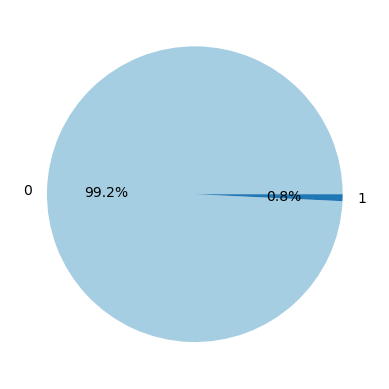

In [5]:
plt.pie(df['waterfront'].value_counts().values, labels=df['waterfront'].value_counts().index, autopct='%1.1f%%');

df['waterfront'].value_counts()

        Домов с видом на набережную ничтожное количество...

Изучите распределение этажей домов

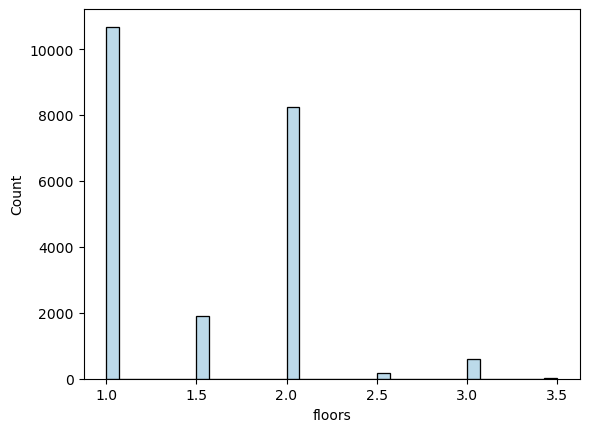

In [6]:
sns.histplot(df, x="floors");

            Больше всего одноэтажных и двухэтажных домов

Изучите распределение состояния домов

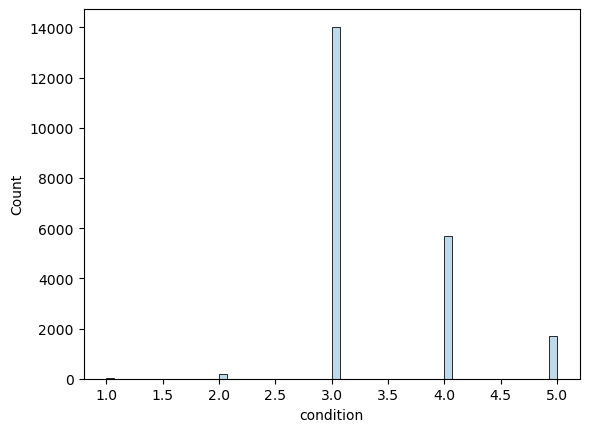

In [7]:
sns.histplot(df, x="condition");

        Домов в плохом состоянии совсем мало. Больше всего в среднем и удовлетворительном.

### Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

    1. Очевидно, параметров домов много. Сначала выберем действительно влияющие (линейно) характристики на основе кореляционого анализа

In [8]:
print("Список признаков, наиболее влияющих на стоимость")

df.corr()['price'][np.abs(df.corr()['price']) > 0.5]

Список признаков, наиболее влияющих на стоимость


price            1.000000
bathrooms        0.525138
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64

        Получилось как раз 5 параметров. Соберем датасет только из влияющих.

In [9]:
infl_params = df[df.corr()['price'][np.abs(df.corr()['price']) > 0.5].keys()]

infl_params.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


Посмотрим на коррреляцию внутри выделенного массива признаков.

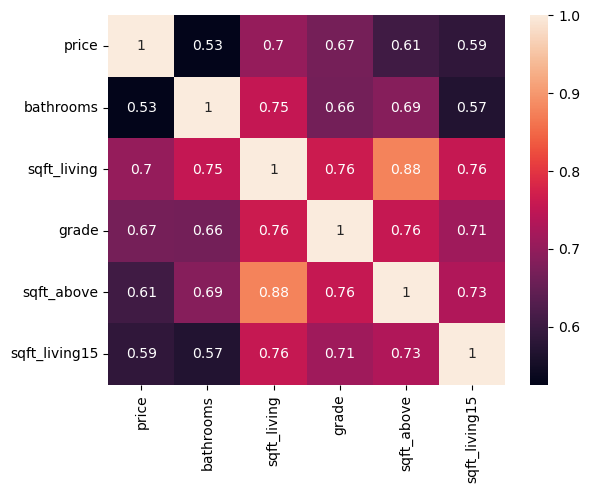

In [10]:
sns.heatmap(infl_params.corr(), annot=True);

Видно, что число ванных имеет хорошую прямую линейную связь с жиилой площадью и площадью "верхнего этажа".
Жилая площадь практически линейно связана с площадью верхнего этажа, как это ни странно.
Параметр grade тесно связан с  жиолй площадью.
Ну а на цену больше всего влияет жилая площадь.


Хотя имеет смысл посмотреть и на пространственное изенение цены. Вдруг она зависит еще и от удаленности от моря. Возможно, там зависимость нелинейная.

In [11]:
from keplergl import KeplerGL

map_ = KeplerGL(height = 700)
map_.add_data(df, "Data")
map_.save_to_html(file_name = "map.html")

ModuleNotFoundError: No module named 'keplergl'

...но почему-то кеплер не вилится системой...